# drinks.csv 파일 로드
---
- 결측치 확인
- continent 컬럼에 결측치 문제 -> 결측치는 'OT' 변경
- continent 별 spirit_saving 컬럼의 평균, 최소, 최대, 합을 출력
- 이 데이터를 바형 그래프 출력
- total_liters_of_pure_alcohol 컬럼의 평균보다 높은 cotinent가 어디인지

In [115]:
import pandas as pd
import numpy as np
df_drinks = pd.read_csv("../csv/drinks.csv")

In [116]:
np.nan

nan

In [117]:
df_drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [118]:
#결측치확인
df_drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

- fillna() : 결측치 채우기

In [119]:
df_drinks["continent"] = df_drinks["continent"].fillna("OT")

## plot

In [120]:
df_drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


## - agg([,,]) : 함수 한 번에 계산하여, 함수별 계산값을 열별로 반환

In [143]:
#x,y설정 방법1
result = df_drinks.groupby("continent").agg(["mean","sum","min","max"])["spirit_servings"]
a = result["mean"]
b = result["sum"]
c = result["min"]
d = result["max"]

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_83803/2072816908.py:1: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_drinks.groupby("continent").agg(["mean","sum","min","max"])["spirit_servings"]


,mean,sum,min,max
continent,,,,
AF,16.339623,866,0,152
AS,60.840909,2677,0,326
EU,132.555556,5965,0,373
OC,58.437500,935,0,254
OT,165.739130,3812,68,438
SA,114.750000,1377,25,302


In [ ]:
#x,y설정 방법2
a=df_drinks.groupby("continent").mean()["spirit_servings"].to_list()
b=df_drinks.groupby("continent").min()["spirit_servings"].to_list()
c=df_drinks.groupby("continent").max()["spirit_servings"].to_list()
d=df_drinks.groupby("continent").sum()["spirit_servings"].to_list()

x=df_drinks.groupby("continent").mean()["spirit_servings"].index
x

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

In [126]:

x= df_drinks.groupby("continent").mean()["spirit_servings"].index


Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

In [123]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

> 바형은 데이터(y)하나만 넣으면 안된다. x도 같이 넣어줘야 플롯이된다.

<function matplotlib.pyplot.show(close=None, block=None)>

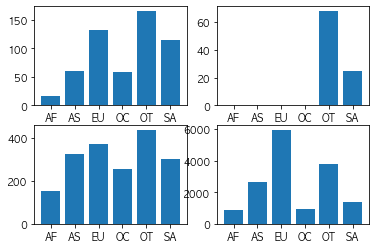

In [131]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.subplot(2,2,1)
plt.bar(x,a)

plt.subplot(2,2,2)
plt.bar(x,b)

plt.subplot(2,2,3)
plt.bar(x,c)

plt.subplot(2,2,4)
plt.bar(x,d)

plt.show

In [145]:
mean_all = df_drinks["total_litres_of_pure_alcohol"].mean()

In [146]:
mean_continent = df_drinks.groupby("continent").mean()["total_litres_of_pure_alcohol"]

In [147]:
mean_continent[mean_continent>mean_all]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

## plot_detail

In [148]:
import numpy as np

In [151]:
x

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

In [156]:
# index = np.arange(cnt)
cnt =len(x)
cnt #6

index = np.arange(len(x))
index

array([0, 1, 2, 3, 4, 5])

## - plot을 한 스크린에 띄우는데, 값들이 겹쳐서 안보이면 안되니 bar_width만큼 x값에 더해서 x축 이동

- 한 스크린에 여러개를 plot할 때는 x축이 arange()로 만든 연속숫자여야함. 이후 바두께만큼 이동시킨 뒤, xticks로 x라벨을 대체.
- xticks(a,b) : 기존라벨 a에서 대체라벨 b로 바꾼다!

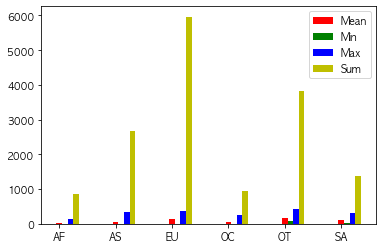

In [171]:
bar_width = 0.1

plt.bar(index, a, bar_width, color='r', label="Mean")
plt.bar(index+bar_width, b, bar_width, color='g', label="Min")
plt.bar(index+bar_width*2, c, bar_width, color='b', label="Max")
plt.bar(index+bar_width*3, d, bar_width, color='y', label="Sum")

plt.xticks(index, x)
plt.legend()

plt.show()